<a href="https://colab.research.google.com/github/lathu-24/Machine-Learning/blob/main/2506728_20241682_lathusan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Basic libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)

# Load dataset
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Show first 5 rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Shape of the dataset
df.shape

(7043, 21)

In [4]:
#convert the total charges coloumn in to float
#column types , missing values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Check unique values before mapping
print(df["Churn"].unique())

['No' 'Yes']


In [6]:
# Strip spaces and standardize
df["Churn"] = df["Churn"].astype(str).str.strip()

# Map to 0/1
df["Churn"] = df["Churn"].map({"No": 0, "Yes": 1})

In [7]:
print(df["Churn"].unique())
print("Missing in Churn:", df["Churn"].isnull().sum())

[0 1]
Missing in Churn: 0


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:


# Quick statistical summary (numerical features only)
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441,0.265370
std,0.368612,24.559481,30.090047,2266.771362,0.441561
min,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.500000,401.450000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000
75%,0.000000,55.000000,89.850000,3794.737500,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


In [10]:
# Check missing values
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [11]:
# Remove rows where TotalCharges is missing
df = df.dropna(subset=["TotalCharges"])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [13]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [14]:
df["Churn"].value_counts()
df["Churn"].value_counts(normalize=True) * 100

,proportion
Churn,
0,73.421502
1,26.578498


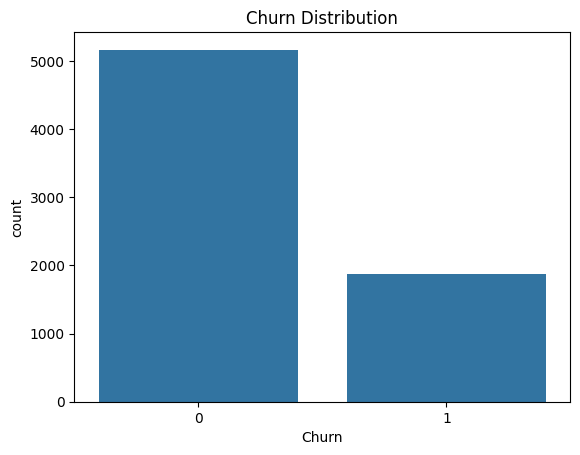

In [15]:
#optional
sns.countplot(x=df["Churn"])
plt.title("Churn Distribution")
plt.show()

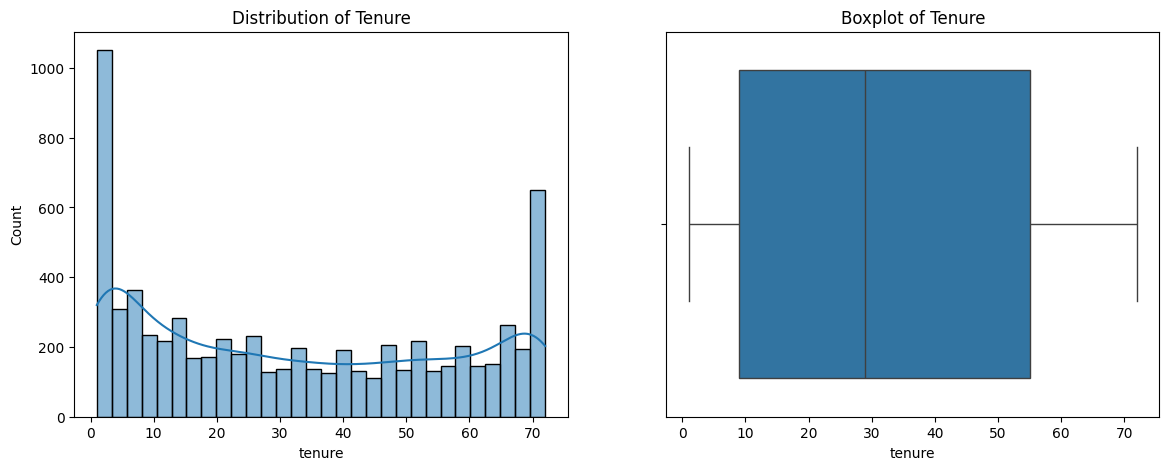

In [16]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
sns.histplot(df["tenure"], kde=True, bins=30)
plt.title("Distribution of Tenure")

plt.subplot(1,2,2)
sns.boxplot(x=df["tenure"])
plt.title("Boxplot of Tenure")

plt.show()

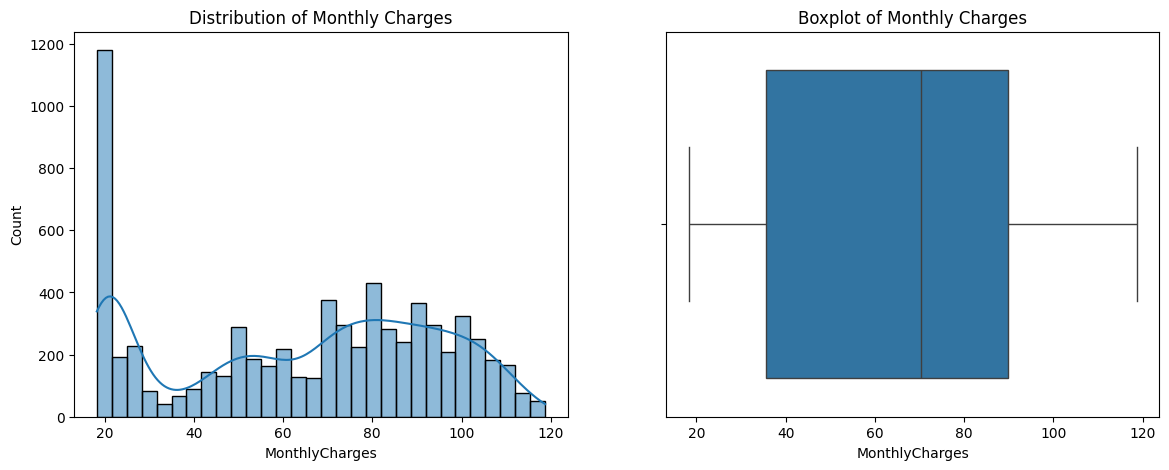

In [17]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
sns.histplot(df["MonthlyCharges"], kde=True, bins=30)
plt.title("Distribution of Monthly Charges")

plt.subplot(1,2,2)
sns.boxplot(x=df["MonthlyCharges"])
plt.title("Boxplot of Monthly Charges")

plt.show()

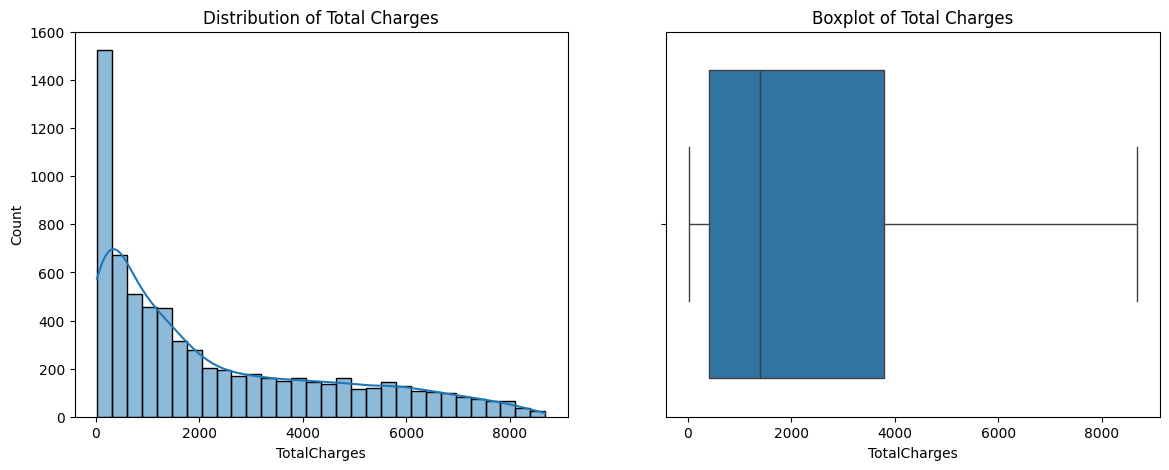

In [18]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
sns.histplot(df["TotalCharges"], kde=True, bins=30)
plt.title("Distribution of Total Charges")

plt.subplot(1,2,2)
sns.boxplot(x=df["TotalCharges"])
plt.title("Boxplot of Total Charges")

plt.show()

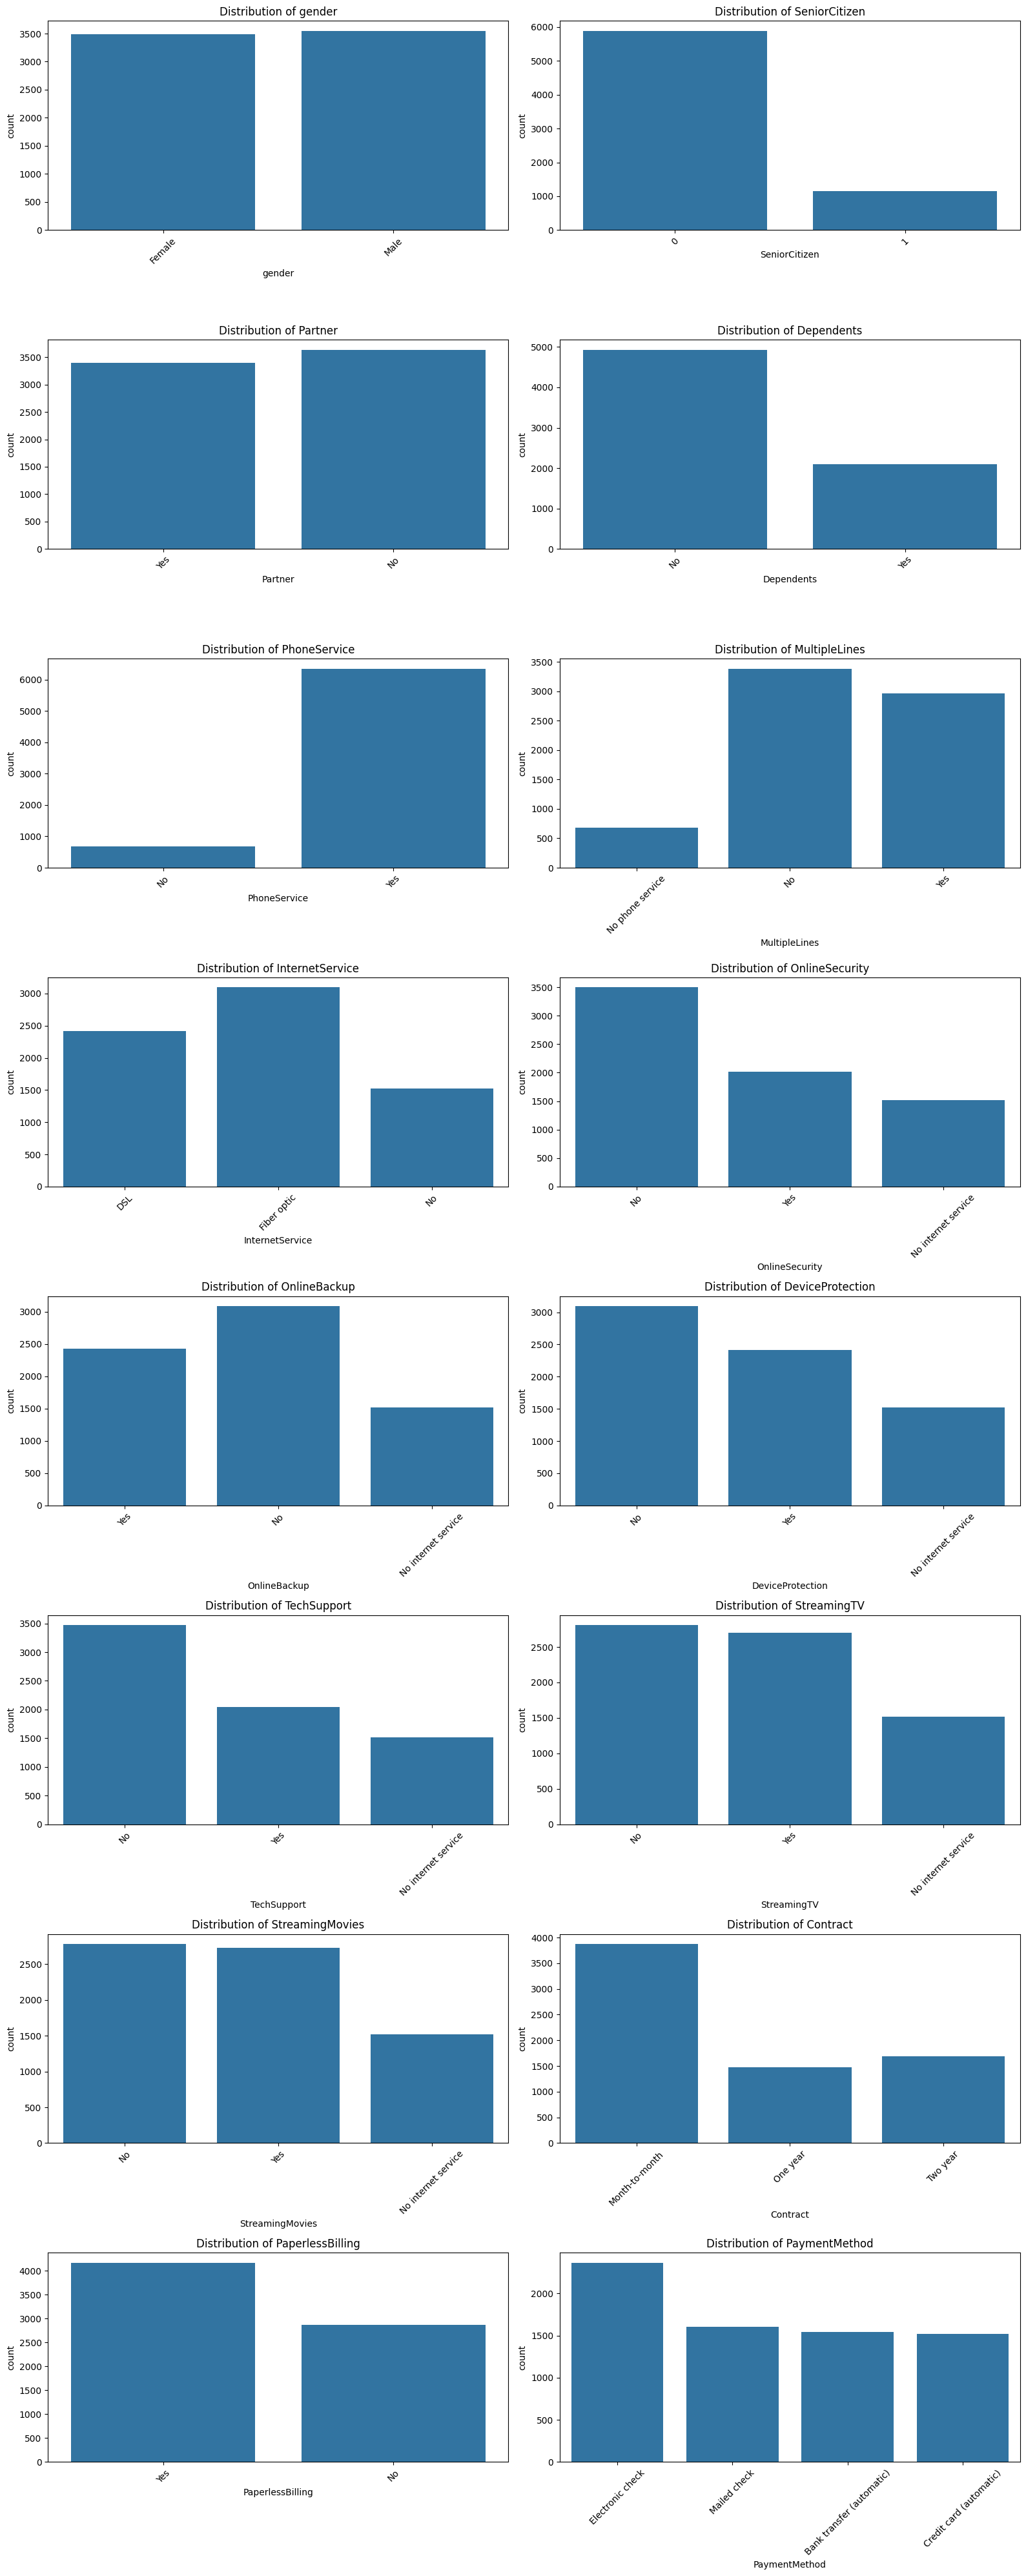

In [19]:
categorical_cols = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

plt.figure(figsize=(16, 40))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(8, 2, i)
    sns.countplot(data=df, x=col)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

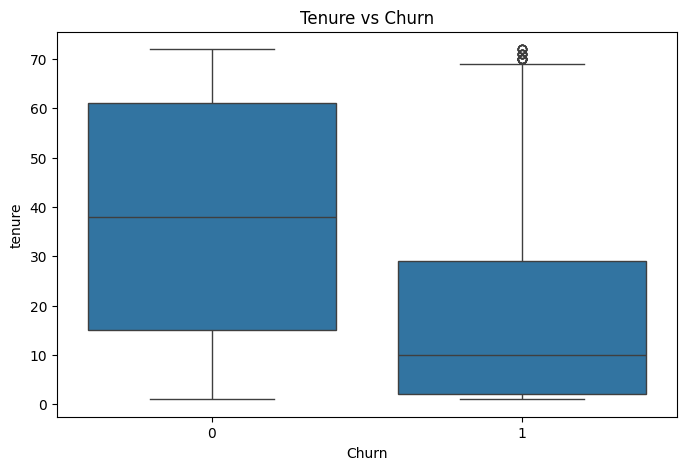

In [20]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Churn", y="tenure", data=df)
plt.title("Tenure vs Churn")
plt.show()

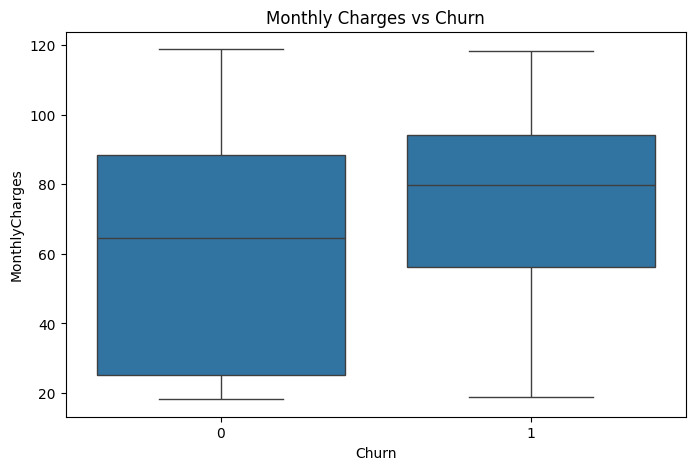

In [21]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.title("Monthly Charges vs Churn")
plt.show()

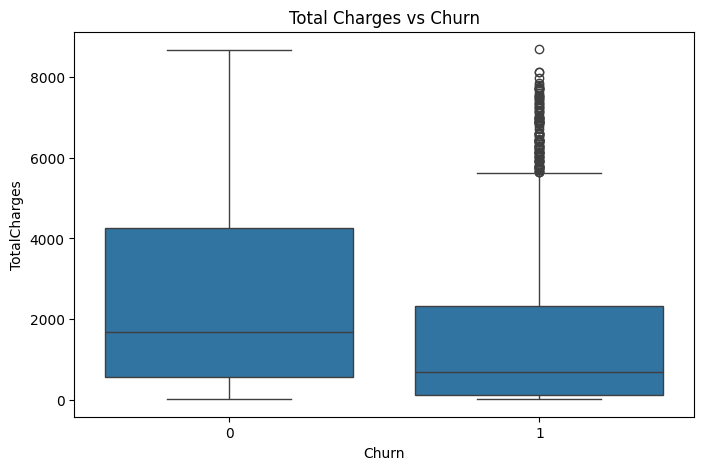

In [22]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Churn", y="TotalCharges", data=df)
plt.title("Total Charges vs Churn")
plt.show()

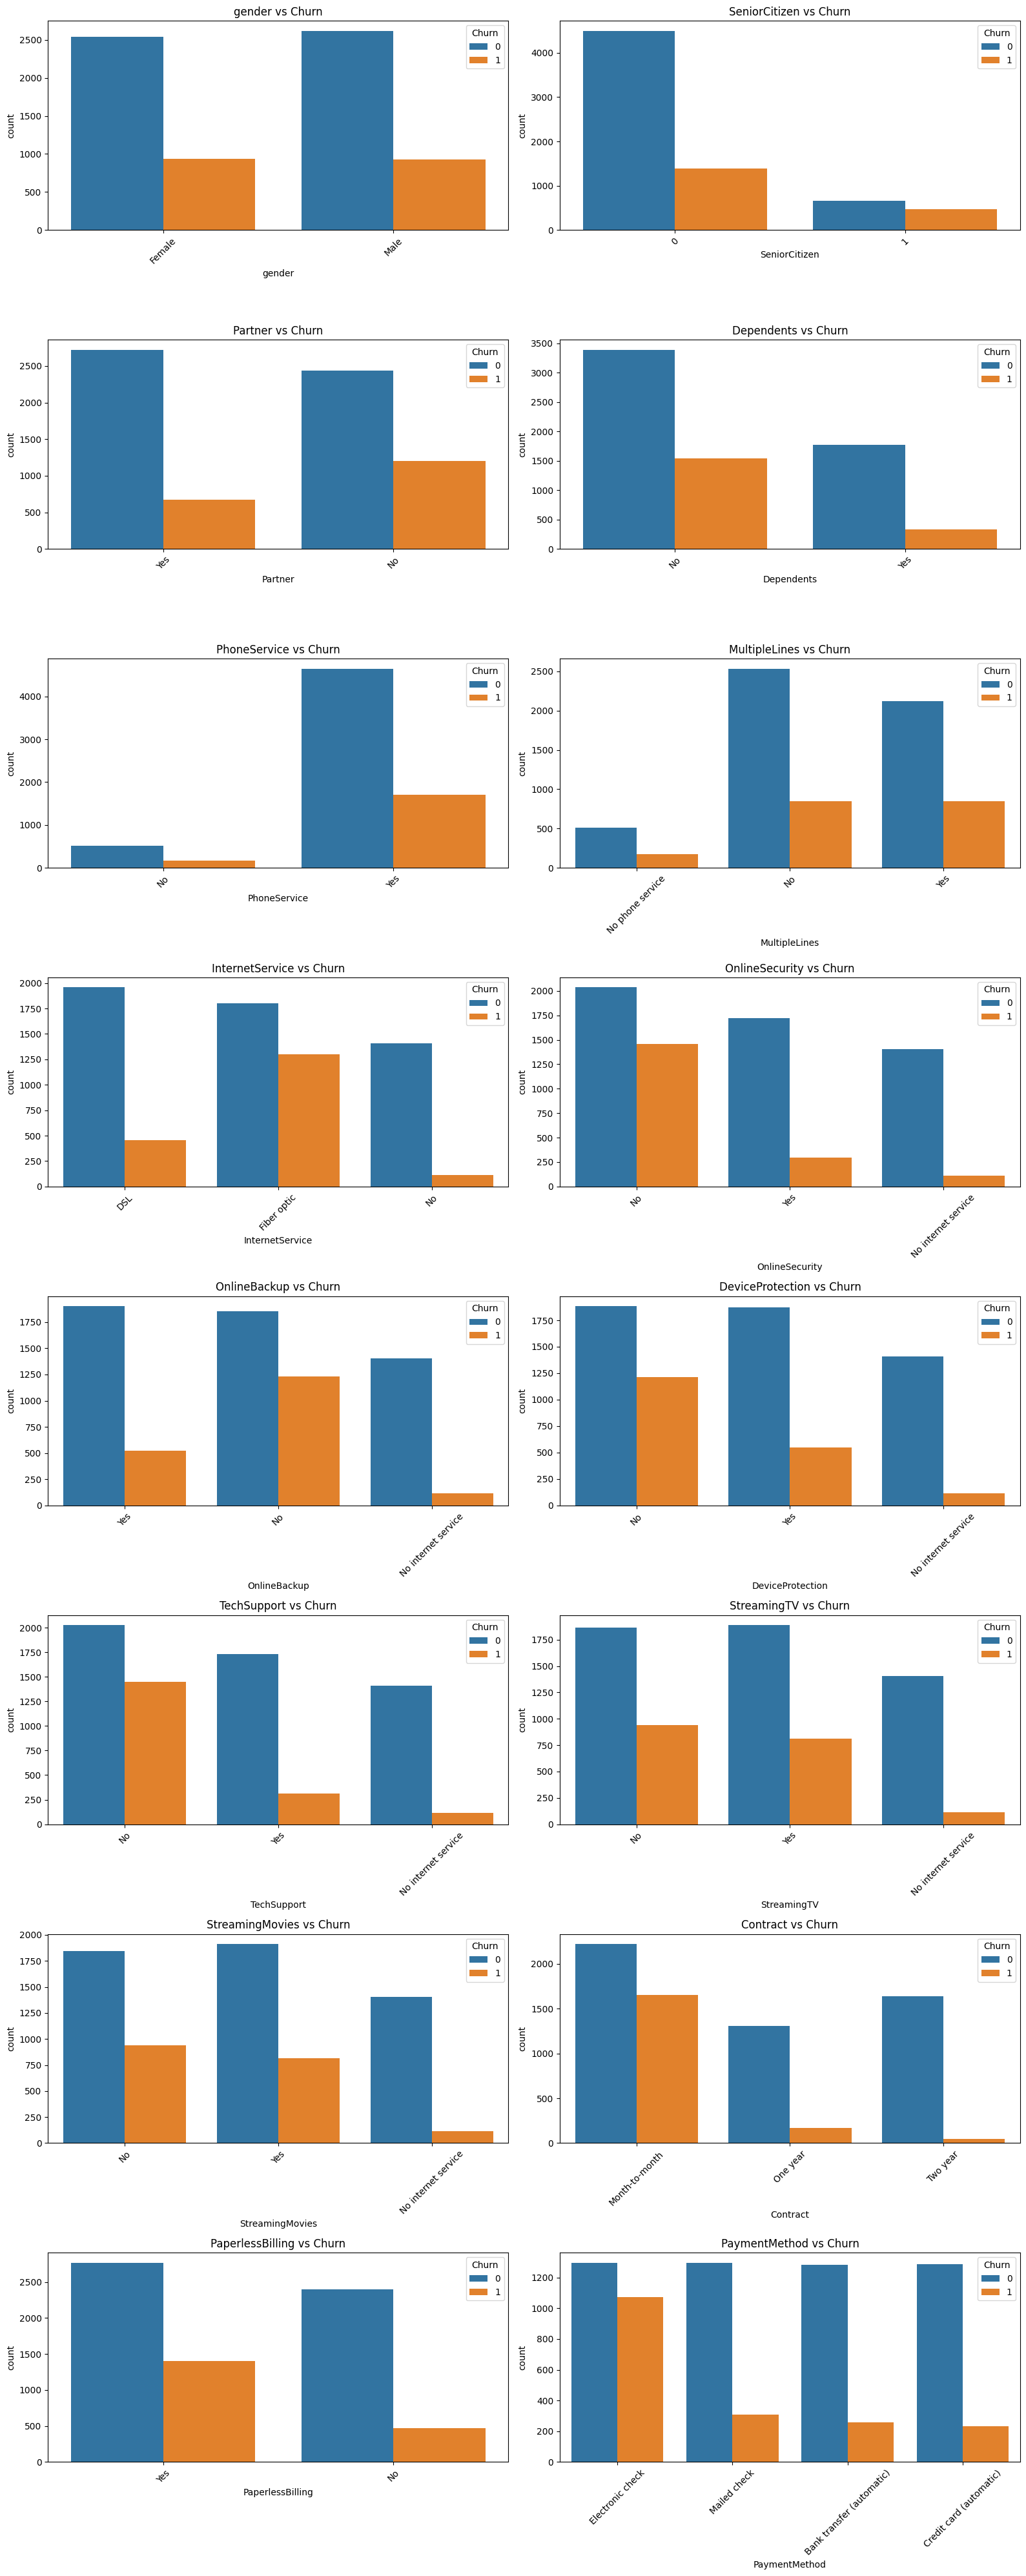

In [23]:
plt.figure(figsize=(16, 40))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(8, 2, i)
    sns.countplot(data=df, x=col, hue="Churn")
    plt.title(f"{col} vs Churn")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

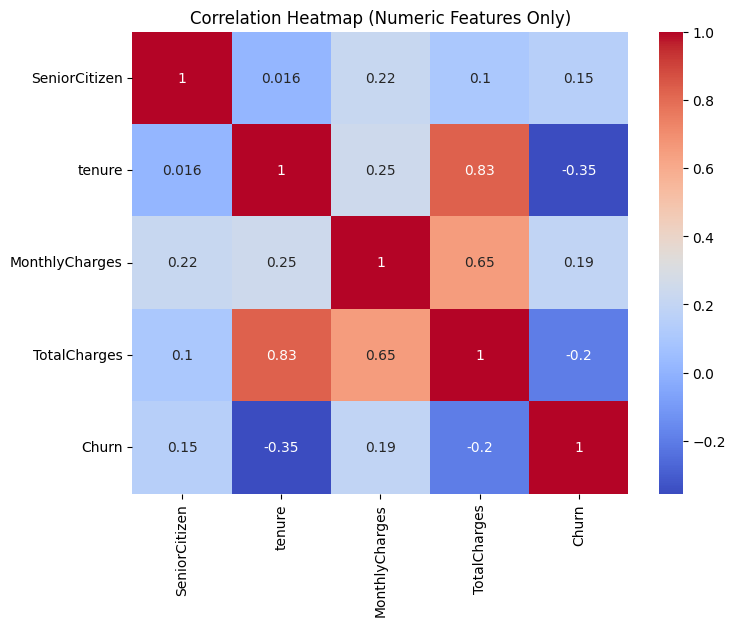

In [24]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()

In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Separate features and target
X = df.drop("Churn", axis=1)
y = df["Churn"]

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=["object"]).columns
numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", StandardScaler(), numeric_cols)
    ]
)

In [26]:
df["Churn"].isnull().sum()
df["Churn"].unique()

array([0, 1])

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [28]:
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline

# Neural Network architecture
nn_model = MLPClassifier(
    hidden_layer_sizes=(64, 32),   # two hidden layers
    activation='relu',
    solver='adam',
    max_iter=300,
    random_state=42
)

# Pipeline combines preprocessing + model
nn_pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', nn_model)
])

In [29]:
nn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')),
                                                 ('num', StandardScaler(),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object'))])),
                ('model',
                 MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=300,
                               random_state=42))])

In [30]:
#Evaluate the Model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred_nn = nn_pipeline.predict(X_test)

print("Neural Network Accuracy:", accuracy_score(y_test, y_pred_nn))

Neural Network Accuracy: 0.7867803837953091


In [31]:
print(classification_report(y_test, y_pred_nn))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85      1033
           1       0.59      0.65      0.62       374

    accuracy                           0.79      1407
   macro avg       0.73      0.74      0.74      1407
weighted avg       0.79      0.79      0.79      1407



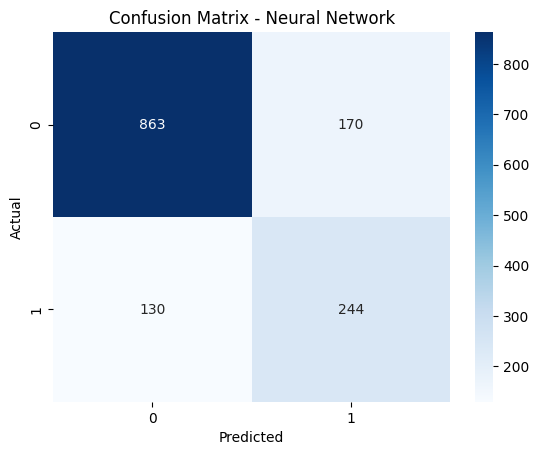

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_nn)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Neural Network")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [34]:
# Import Decision Tree and tools for building ML pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

# Import evaluation metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# For visualizing the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
# Create a basic Decision Tree model
# max_depth=None → no depth limit (tree can grow fully)
# criterion can be 'gini' or 'entropy'
dt_model = DecisionTreeClassifier(
    criterion="gini",
    max_depth=None,
    random_state=42
)

# Build a pipeline: first preprocess the data → then train the model
dt_pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),   # OneHotEncoding + Scaling
    ('model', dt_model)             # Decision Tree model
])

In [36]:
# Fit the model using training data
dt_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')),
                                                 ('num', StandardScaler(),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object'))])),
                ('model', DecisionTreeClassifier(random_state=42))])

In [37]:
# Predict labels for the test set
y_pred_dt = dt_pipeline.predict(X_test)

Decision Tree Accuracy: 0.7654584221748401
              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1033
           1       0.57      0.49      0.53       374

    accuracy                           0.77      1407
   macro avg       0.70      0.68      0.69      1407
weighted avg       0.76      0.77      0.76      1407



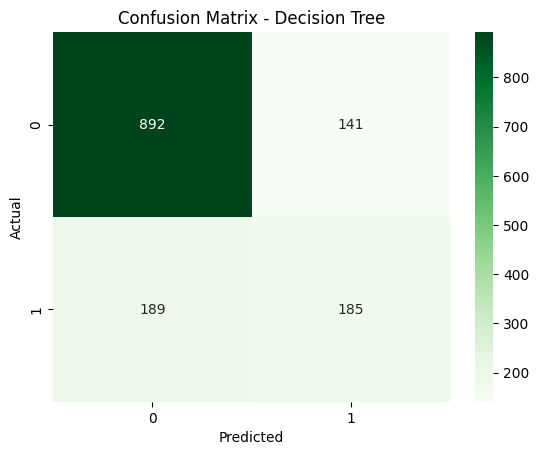

In [38]:
# Print accuracy score
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

# Detailed performance on both classes (0 = No churn, 1 = Churn)
print(classification_report(y_test, y_pred_dt))

# Generate confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Visualize confusion matrix using heatmap
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [39]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter search space
param_grid_dt = {
    'model__criterion': ['gini', 'entropy'],   # impurity measure
    'model__max_depth': [None, 5, 10, 20, 30], # tree depth
    'model__min_samples_split': [2, 5, 10],    # minimum samples needed to split
    'model__min_samples_leaf': [1, 2, 4],      # minimum samples per leaf
    'model__splitter': ['best', 'random']      # how to choose split
}

# Perform Grid Search with 3-fold cross-validation
grid_dt = GridSearchCV(
    dt_pipeline,
    param_grid_dt,
    cv=3,
    n_jobs=-1,
    scoring="accuracy"
)

# Train Grid Search model
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'Pape...
                                                                         Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object'))])),
                                       ('model',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': [None, 5, 10, 20, 30],
                         'model__min_samples_leaf': [1, 2, 4],
                         'model__min_samples_split': [2, 5, 10],
                         'model__splitter': ['best', 'random']},
             scoring='accuracy')

In [40]:
# Print best parameters found by GridSearchCV
print("Best Parameters:", grid_dt.best_params_)

# Extract best model
best_dt = grid_dt.best_estimator_

# Make predictions using best model
best_dt_pred = best_dt.predict(X_test)

# Evaluate best model
print("Best DT Accuracy:", accuracy_score(y_test, best_dt_pred))
print(classification_report(y_test, best_dt_pred))

Best Parameters: {'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 4, 'model__min_samples_split': 2, 'model__splitter': 'random'}
Best DT Accuracy: 0.7725657427149965
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1033
           1       0.57      0.61      0.59       374

    accuracy                           0.77      1407
   macro avg       0.71      0.72      0.72      1407
weighted avg       0.78      0.77      0.78      1407

